In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# Fonctions s'activations et deep learning


## Fonction d'activation
Prenons un réseau de neuronne a $L$ couches.  
Chaque couche $l\in [\![ 1;L ]\!]$ est composée de $n_l$ neuronnes.  
A chaque neuronne $n\in[\![1;n_l]\!]$ on associe un vecteur de poids $W_l^n$ et un biais $b_l^n$.  
On notera $a_l^n$ la sortie du neurone $n$ de la couche $l$.  
Soit $X$ le vecteur des données d'entrée de dimension $n_X$.  
Par convention, on notera $a_0^n$ avec $n\in[\![1,n_X]\!]$ les composante de notre vecteur X.  
On a donc :  
\begin{equation}
    \forall l\in [\![ 1;L ]\!],
    a_{l+1}^n=f\left( \sum_{n=1}^{n_l}{<W_l^n,a_l^n>+b_l^n} \right)
\end{equation}
Où $f$ est ce que l'on appelle la fonction d'activation. La fonction d'activation est clef car elle permet de casser la linéarité de notre reseau de neuronne si on choisit un $f$ non lineaire. En effet, sans f, notre réseau de neuronne ne peut approximer que des fonctions affines. Ce sont les fonction d'activations qui donne le pouvoir de géneralisation aux réseaux de neuronnes. En effet, il est prouvé que les réseaux de neuronnes sont des approximateurs universels de fonctions.

### Quelques fonction d'activations connues
#### La fonction sigmoïde
On définie la fonction sigmoïde comme:  
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

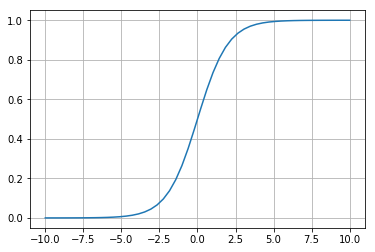

In [2]:
x = np.linspace(-10, 10)


def sigmoid(x, derivative=False):
    if(derivative):
        return(1/(1+np.exp(-x))*(1-1/(1+np.exp(-x))))
    else:
        return(1/(1+np.exp(-x)))


sigmoidx = sigmoid(x)
plt.grid(True)
plt.plot(x, sigmoidx)
plt.show()

La sigmoide à l'avantage d'être $C^\infty$. On a de plus l'expression de sa dérivée première:
$$ \sigma'(x)=\sigma(x)(1-\sigma(x))$$

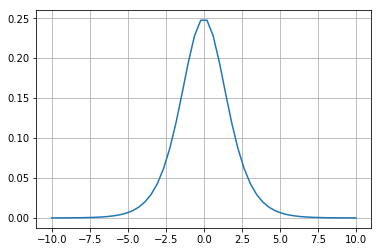

In [3]:
x = np.linspace(-10, 10)
sigmoidprime = sigmoid(x, derivative=True)
plt.grid(True)
plt.plot(x, sigmoidprime)
plt.show()

La fonction sigmoide à longtemps été utilisé dans les réseaux de neuronnes. Elle est surtout utilisé dans la regression logistique qui est un réseau de neuronne à une couche. Aujourd'hui elle est souvent utilisée pour la dernière couche de neuronne pour output le résultat (si on veut par exemple prédire un résultat binaire, on a donc un résultat entre 0 et 1.  

Elle souffre cependant du problème du gradient évanescent et du fait qu'elle n'est pas centrée en 0 ce qui dévie le gradient. De plus, elle peut aussi faire exploser le gradient et une vitesse de convergence assez lente.

#### La fonction tangeante hyperbolique
La fonction tangeante hyperbolique s'ecrit comme suit:
$$tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$

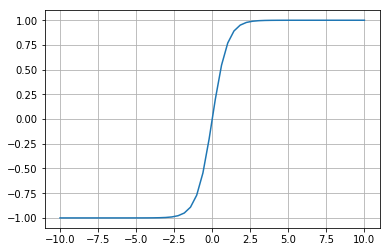

In [4]:
x = np.linspace(-10, 10)
tanhx = np.tanh(x)
plt.grid(True)
plt.plot(x, tanhx)
plt.show()

tanh(x) est aussi $C^\infty$ et à pour dérivée première:
$$tanh'(x)=1+tanh(x)^2$$

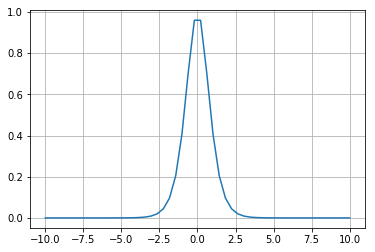

In [5]:
x = np.linspace(-10, 10)
tanhprimex = 1-np.tanh(x)**2
plt.grid(True)
plt.plot(x, tanhprimex)
plt.show()

$tanh$ à été une alternative qui à permit de résoudre le problème de la fonction sigmoïde qui n'est pas centrée en 0 et est borné entre -1 et 1 ce qui facilite l'optimisation mais elle souffre quand même du problème du gradient évenescent.

#### La fonction ReLU
Relu veut dire Rectified Linear Unit. Cette fonction s'ecrit simplement de la façon suivante:
$$ReLU(x)=max(0,x)$$

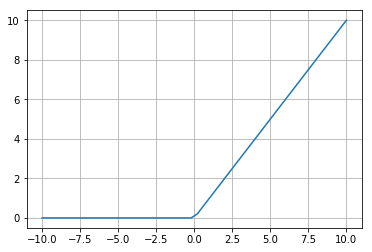

In [6]:
x = np.linspace(-10, 10)
relux = np.maximum(0, x)
plt.grid(True)
plt.plot(x, relux)
plt.show()

ReLU n'est pas dérivable en 0 mais elle l'est sur $\mathbb{R}^*$. Ainsi, sur $\mathbb{R}^*$ la dérivée est:
$$ReLU'(x)=
\left\{
  \begin{array}{rcr}
    0 \text{ si } x<0 \\
    1 \text{ si } x>0 \\
  \end{array}
\right.$$
On pratique, on effectue le prolongement en 0 que l'on peut prendre arbitrairement en 0 ou 1.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


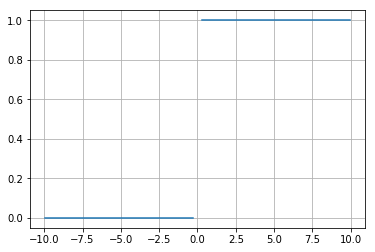

In [7]:
def reluDerivative(x):
    x1 = np.array(x)
    x1[x1 == 0] = np.nan
    x1[x1 < 0] = 0
    x1[x1 > 0] = 1
    return(x1)


x = np.linspace(-10, 10, num=150)
x = x[x < 0]+[0]+x[x > 0]
reluprimex = reluDerivative(x)
plt.grid(True)
plt.plot(x, reluprimex)
plt.show()

ReLU à été une avancée considérable (Krizhevsky et al. 2012) . Elle permet une convergence 6 fois plus rapide que tanh. Ce gain en efficacité à permit l'explosion du deep-learning. Elle est facile à calculer et permet de diminuer le problème de gradient évanescent. Elle est inspirée du fonctionnement biologique de notre cerveau. Cependant, elle n'est pas bornée, n'est pas centrée en zéro et elle subit un problème de neuronnes morte. En effet avec ReLU, on peut observer certaines neuronnes mourir et ne jamais etre utilisée par notre réseau

#### La fonction Leaky-ReLU

Cette fonction est une correction de ReLU pour subsiter au problème de décès des neuronnes. On peut l'ecrire comme:  
Soit $\alpha<1$,
$$LReLU(x)=max(\alpha x,x)$$

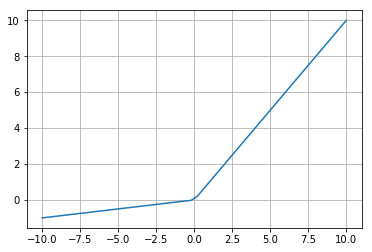

In [8]:
x = np.linspace(-10, 10)
lrelux = np.maximum(0.1*x, x)
plt.grid(True)
plt.plot(x, lrelux)
plt.show()

Comme ReLU, Leaky-Relu n'est pas dérivable en 0 mais elle l'est sur $\mathbb{R}^*$. Ainsi, sur $\mathbb{R}^*$ la dérivée est:
$$LReLU'(x)=
\left\{
  \begin{array}{rcr}
    \alpha \text{ si } x<0 \\
    1 \text{ si } x>0 \\
  \end{array}
\right.$$
On pratique, on effectue le prolongement en 0 que l'on peut prendre arbitrairement en 0 ou 1.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


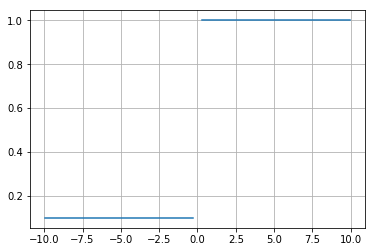

In [9]:
def LreluDerivative(x):
    x1 = np.array(x)
    x1[x1 == 0] = np.nan
    x1[x1 < 0] = 0
    x1[x1 > 0] = 1
    x1[x1 == 0] = 0.1
    return(x1)


x = np.linspace(-10, 10, num=150)
x = x[x < 0]+[0]+x[x > 0]
lreluprimex = LreluDerivative(x)
plt.grid(True)
plt.plot(x, lreluprimex)
plt.show()

Ceci permet de faire mourir les neuronnes. En effet le gradient ne sera plus multiplié par 0 mais par une petite valeur.  
Cette solution est cependant moins efficace à calculer que Relu.

#### La fonction d'activation Swish
La fonction d'activation Swish a été introduite par une équipe de Google Brain (Ramachandran 2017). Suite à une recherche par apprentissage par renforcement, il se trouve que cette fonction est meilleur que RELU sur les réseaux de neuronnes profonds.
Elle prend un hyper-paramètre \beta et s'ecrit:
$$f_{\beta}(x)=x\sigma(\beta x)$$
avec $\sigma(x)=\frac{1}{1+e^{-x}}$ la fonction sigmoïde.
Il est interessant de remarquer que pour $\beta=0$, on a $f_0=\frac{x}{2}$,  
Et asymptotiquement, $f_{\beta}(x)\underset{\beta\rightarrow\infty}{\rightarrow}\left\{
  \begin{array}{rcr}
    0 \text{ si } x<0 \\
    x \text{ si } x\geq0 \\
  \end{array}
\right.=ReLU(x)$  
Regardons quelques exemples

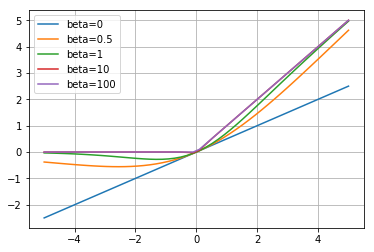

In [10]:
def swish(x, beta):
    return(x*sigmoid(beta*x))


x = np.linspace(-5, 5)
swish0 = swish(x, 0)
swish1 = swish(x, 0.5)
swish2 = swish(x, 1)
swish3 = swish(x, 10)
swish4 = swish(x, 100)
plt.grid(True)
plt.plot(x, swish0, label='beta=0')
plt.plot(x, swish1, label='beta=0.5')
plt.plot(x, swish2, label='beta=1')
plt.plot(x, swish3, label='beta=10')
plt.plot(x, swish4, label='beta=100')
plt.legend(loc='upper left')
plt.show()

On peut aussi regarder notre fonction en faisant varier $\beta$

In [11]:
@interact(beta=widgets.FloatLogSlider(min=-2, max=2))
def ploting_swish(beta):
    x = np.linspace(-5, 5)
    plt.grid(True)
    plt.plot(x, swish(x, beta))
    plt.show()

interactive(children=(FloatLogSlider(value=1.0, description='beta', max=2.0, min=-2.0), Output()), _dom_classe…

On peut donc voir swish comme une interpolation de ReLU avec un paramètre $\beta$ comme paramètre d'interpolation. Plus $\beta$ est grand, plus Swish se rapproche de Relu.

<span color='red'>Preuve non finie</span>
Une idée interessante peut être de calculer à quelle vitesse Swish tend vers Relu lorsque $\beta$ tend vers l'infini. Nous allons essayer nous placer dans l'espace normé $(C^0[-a,a],\left\|.\right\|_2)$. On se place sur un segment pour des soucis de convergences. De toute façon ce qui nous interesse le plus est la convergence au voisinage de 0.  
On a donc $\forall x\in[-a,a]$
$$
\left\|Relu(x)-Swish(x,\beta)\right\|_2=\int_a^{-a} (Relu(x)-Swish(x,\beta))^{2} \, \mathrm dx  \\
= \int_a^{-a} Relu(x)^2 -2Relu(x)Swish(x,\beta)+Swish(x,\beta)^2 \, \mathrm dx  
$$
On a assez facilement que $\int_a^{-a} Relu(x)^2 \, \mathrm dx  =\frac{a^2}{2}$
PAr contre, je ne suis pas arrivé à calculer les 2 termes. Le mieux que je peux faire est un DL de ma fonction mais les calculs n'aboutissent pas.

##### Propriété: Swish et bornes
1. Swish n'est pas majoré.  
    En effet, on a $f_{\beta}(x)\underset{x\rightarrow\infty}{\sim}x$ et donc $f_{\beta}(x)\underset{x\rightarrow\infty}{\rightarrow}\infty$.
    Comme notre fonction tend vers $+\infty$ elle n'est donc pas bornée
2. Swish est minorée.  
    En effet, sur $[0,\infty[$, on a $f_{\beta}(x)>0$. Donc, notre fonction est minorée sur $[0,\infty[$  
    Or $f_{\beta}(x)\underset{x\rightarrow-\infty}{\rightarrow}0$ et $f_{\beta}(0)=0$.  
    Par continuité de notre fonction, elle est donc bornée sur $]-\infty,0]$ et donc en particulier elle est minorée.

##### Propriété: Non Monotonie
$\forall \beta>0$, Swish est non monotone.
Preuve:
Par l'absurde. Supposons que Swish soit monotone. Or, on sait que $f_{\beta}(x)\underset{x\rightarrow-\infty}{\rightarrow}0$ et $f_{\beta}(0)=0$.  
Or, si Swish est monotone, on a $\forall x\in]-\infty,0], f_{\beta}(x)=0$.  
Cependant, $f_{\beta}(-1)=\frac{-1}{1+e^{-\beta}}\neq0$. On obtient une contradiction. Donc, Swish n'est pas monotone.  
Contrairement au autres fonctions d'activation citée précédément, swish à cette particularité de ne pas etre monotone. De plus cette propriété s'exprime dans le voisinage de 0, zone qui nous interesse puisque c'est à priori dans cette zone la que nos neuronnes traitent. Cette propriété est donc interessante et pourrait expliquer une différence de performance.

##### Propriété: Dérivée de Swish
On peut calculer la dérivée de swish et on trouve que:
$$f_{\beta}^{'}(x)=\sigma(\beta x)+\beta x\sigma(\beta x)(1-\sigma(\beta x) \\
=f_{\beta}(x)+\sigma(\beta x)(1-\beta f_{\beta}(x))$$
Preuve:  
On a:
$$f_{\beta}^{'}(x)=\frac{1+e^{-\beta x}+\beta x e^{-\beta x}}{(1+e^{-\beta x})^2}=\frac{1}{1+e^{-\beta x}}+\frac{\beta x e^{-\beta x}}{(1+e^{-\beta x})^2}\\
=\frac{1}{1+e^{-\beta x}}+\beta x\frac{1}{1+e^{-\beta x}}\frac{e^{-\beta x}}{1+e^{-\beta x}} \\
=\frac{1}{1+e^{-\beta x}}+\beta x\frac{1}{1+e^{-\beta x}}\frac{1+e^{-\beta x}-1}{1+e^{-\beta x}} \\
=\sigma(\beta x)+\beta x\sigma(\beta x)(1-\sigma(\beta x))$$
On a ensuite:
$$f_{\beta}^{'}(x)=\sigma(\beta x)+\beta x\sigma(\beta x)(1-\sigma(\beta x)=\beta x\sigma(\beta x)+\sigma(\beta x)-\beta x\sigma(\beta x)^2 \\
=f_{\beta}(x)+\sigma(\beta x)(1-\beta f_{\beta}(x))$$

#### Propriété: Limites asymptotique de dérivée de Swish
On constate que $f_{\beta}^{'}(x)\underset{\beta\rightarrow\infty}{\rightarrow}\left\{
  \begin{array}{rcr}
    0 \text{ si } x<0 \\
    0.5 \text{ si } x=0 \\
    1 \text{ si } x>0 \\
  \end{array}
\right.$  
Preuve: 
On a,
$$f_{\beta}^{'}(x)=\frac{1+e^{-\beta x}+\beta x e^{-\beta x}}{(1+e^{-\beta x})^2}=\frac{1}{1+e^{-\beta x}}+\frac{\beta x e^{-\beta x}}{(1+e^{-\beta x})^2}$$ 
Or, si $x<0$, $\frac{1}{1+e^{-\beta x}}\underset{\beta\rightarrow\infty}{\rightarrow}0$ et $\frac{1}{1+e^{-\beta x}}\underset{\beta\rightarrow\infty}{\rightarrow}0$.  
Donc si $x<0$, $f_{\beta}^{'}(x)\underset{\beta\rightarrow\infty}{\rightarrow}0$  
Maintenant, si $x>0$, $\frac{1}{1+e^{-\beta x}}\underset{\beta\rightarrow\infty}{\rightarrow}1$ et $\frac{1}{1+e^{-\beta x}}\underset{\beta\rightarrow\infty}{\rightarrow}0$.  
Donc si $x<0$, $f_{\beta}^{'}(x)\underset{\beta\rightarrow\infty}{\rightarrow}1$.  
On a de plus $\forall \beta, f_{\beta}(0)=0.5$ D'ou le resultat.

On retrouve ici la dérivée de Relu ce qui est logique car Swish approche ReLU. Cependant, la dérivée de ReLU est prolongée en 0 alors que ici, on n'a pas de problème de définition. Ici, en 0 la valeur est de 0.5 contrairement à la dérivée de Relu ou on avait décider arbitrairement de la prolongée en la valeur 0.

Une autre propriété interessante est que $\forall \beta$, $f_{\beta}^{'}(x)\underset{x\rightarrow\infty}{\rightarrow}1$ et $f_{\beta}^{'}(x)\underset{x\rightarrow-0}{\rightarrow}0$
Preuve: Identique à la précédente.
On voit ici que la dérivée de Swish à les mêmes limites que les limites de la dérivée de ReLU.  
De plus, comme notre dérivée est continue, on en déduit que la dérivée Swish est bornée.

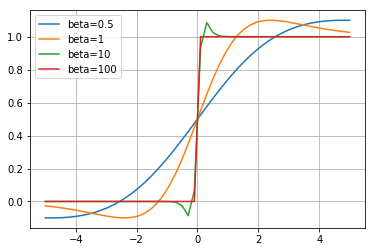

In [12]:
def derivSwish(x, beta):
    return(sigmoid(beta*x)+beta*x*sigmoid(beta*x)*(1-sigmoid(beta*x)))


x = np.linspace(-5, 5)
dswish1 = derivSwish(x, 0.5)
dswish2 = derivSwish(x, 1)
dswish3 = derivSwish(x, 10)
dswish4 = derivSwish(x, 100)
plt.grid(True)
plt.plot(x, dswish1, label='beta=0.5')
plt.plot(x, dswish2, label='beta=1')
plt.plot(x, dswish3, label='beta=10')
plt.plot(x, dswish4, label='beta=100')
plt.legend(loc='upper left')
plt.show()

In [13]:
@interact(beta=widgets.FloatLogSlider(min=-2, max=2))
def ploting_dswish(beta):
    x = np.linspace(-5, 5)
    plt.grid(True)
    plt.plot(x, derivSwish(x, beta))
    plt.show()

interactive(children=(FloatLogSlider(value=1.0, description='beta', max=2.0, min=-2.0), Output()), _dom_classe…

### Benchmark de nos fonctions d'activations
Nous allons entrainer un réseau de neuronne pour pouvoir vérifier les performances de nos fonction d'activation dans différentes stuations. Nous llon effectuer ces test sur le jeu de données CIFAR-10:

## Approximation des réseaux de neurones par des processus gaussiens


Nous allons essayer de donner une approximation de notre réseau de neuronnes de la façon suivante: 
On considerera une variance des poids et des biais $(\sigma_{w}^2,\sigma_{b}^2)$.  
On prendre maintenant:
$$W_{i,j}^l\overset{iid}{\sim}\mathcal{N}(0,\frac{\sigma_{w}^2}{N_{l-1}}) \\
B_{i}^l\overset{iid}{\sim}\mathcal{N}(0,\sigma_b^2)$$
On rappelera que pour une fonction d'activation $\phi$:
$$y_i^1(a)=\sum_{j=1}^{N_0}W_{i,j}^1a_j+B_{i}^1 \\
y_i^l(a)=\sum_{j=1}^{N_{l-1}}W_{i,j}^l\phi(y_j^{l-1})+B_{i}^l $$
### Relation pour le calcul du noyau de variance
On considérera que les $y_i^l \sim\mathcal{GP}(0,\kappa^l)$ avec $\kappa^l$ le noyau de convergence.  
Cela correspond à une simplification du cas limite où $N_{l-1}\rightarrow\infty$ qui tend vers une loi normale pour tout $a$ par le théorème centrale limite.
#### Propriété: Relation recurrente noyaux de variance
Comme $W_{i,j}$ et $B_{i}^l$ sont centrés en 0 il vient immediatement que$\forall a\in\mathbb{R}^d$, $\mathbb{E}[y_i^l(a)]=0$.
On peut aussi montrer que $\forall a,b \in\mathbb{R}^d$:
$$\kappa^l(a,b)=\mathbb{E}[y_i^l(a)y_i^l(b)]=\sigma_b^2+ \sigma_w^2\mathbb{E}[\phi(y_i^{l-1}(a))\phi(y_i{l-1}(b))]$$
Preuve:
$$\mathbb{E}[y_i^l(a)y_i^l(b)]=\mathbb{E}[(\sum_{j=1}^{N_{l-1}}W_{i,j}^l\phi(y_j^{l-1}(a))+B_{i}^l)(\sum_{j=1}^{N_{l-1}}W_{i,j}^l\phi(y_j^{l-1}(b))+B_{i}^l)]\\
=\mathbb{E}[(B_i^l)^2]+\mathbb{E}[\sum_{j=1}^{N_{l-1}}W_{i,j}^l\phi(y_j^{l-1}(a))B_{i}^l]+\mathbb{E}[B_{i}^l\sum_{j=1}^{N_{l-1}}W_{i,j}^l\phi(y_j^{l-1}(b))] + \mathbb{E}[\sum_{k=1}^{N_{l-1}}\sum_{j=1}^{N_{l-1}}W_{i,j}^lW_{i,k}^l\phi(y_j^{l-1}(a))\phi(y_k^{l-1}(b))] \\
\textrm{Par indépendance de } B_{i}^l \textrm{ avec }W_{i,j} \textrm{ on a }\\
=\mathbb{E}[(B_i^l)^2]+\mathbb{E}[\sum_{j=1}^{N_{l-1}}W_{i,j}^l\phi(y_j^{l-1}(a))]\mathbb{E}[B_{i}^l]+\mathbb{E}[B_{i}^l]\mathbb{E}[\sum_{j=1}^{N_{l-1}}W_{i,j}^l\phi(y_j^{l-1}(b))] + \mathbb{E}[\sum_{k=1}^{N_{l-1}}\sum_{j=1}^{N_{l-1}}W_{i,j}^lW_{i,k}^l\phi(y_j^{l-1}(a))\phi(y_k^{l-1}(b))] \\
\textrm{Or on a }\mathbb{E}[B_{i}^l]=0 \\
=\mathbb{E}[(B_i^l)^2]+ \mathbb{E}[\sum_{k=1}^{N_{l-1}}\sum_{j=1}^{N_{l-1}}W_{i,j}^lW_{i,k}^l\phi(y_j^{l-1}(a))\phi(y_k^{l-1}(b))] \\
\textrm{Par linéarité de l'espérance, on a}\\
=\mathbb{E}[(B_i^l)^2]+ \sum_{k=1}^{N_{l-1}}\sum_{j=1}^{N_{l-1}}\mathbb{E}[W_{i,j}^lW_{i,k}^l\phi(y_j^{l-1}(a))\phi(y_k^{l-1}(b))]\\
\textrm{Par indépendance des } W_{i,j}^l \textrm{ avec les }W_{i,j}^{l-1} \textrm{ on a }\\
=\mathbb{E}[(B_i^l)^2]+ \sum_{k=1}^{N_{l-1}}\sum_{j=1}^{N_{l-1}}\mathbb{E}[W_{i,j}^lW_{i,k}^l]\mathbb{E}[\phi(y_j^{l-1}(a))\phi(y_k^{l-1}(b))]\\
\textrm{Par indépendance des } W_{i,j}^l \textrm{ avec les }W_{i,k}^{l} \textrm{ avec } k\neq j \textrm{ on a}\\
=\mathbb{E}[(B_i^l)^2]+ \sum_{j=1}^{N_{l-1}}\mathbb{E}[(W_{i,j}^l)^2]\mathbb{E}[\phi(y_j^{l-1}(a))\phi(y_j^{l-1}(b))]\\
=\sigma_b^2+ \sum_{j=1}^{N_{l-1}}\frac{\sigma_w^2}{N_{l-1}}\mathbb{E}[\phi(y_j^{l-1}(a))\phi(y_j^{l-1}(b))]\\
\textrm{Or, comme } \forall j\in[|1,N_{l-1}|] \textrm{ les }y_j^{l-1} \textrm{ sont identiquement distribués}\\
=\sigma_b^2+ N_{l-1}\frac{\sigma_w^2}{N_{l-1}}\mathbb{E}[\phi(y_i^{l-1}(a))\phi(y_i^{l-1}(b))]\\
=\sigma_b^2+ \sigma_w^2\mathbb{E}[\phi(y_i^{l-1}(a))\phi(y_i^{l-1}(b))]$$

On notera désormais $q_{ab}=\kappa^l(a,b)$. Par simplification, on notera $q_a^l=q_{aa}^l$. De plus on notera $c_{ab}^l=\frac{q_{ab}^l}{\sqrt{q_a^lq_b^l}}$ le coefficient de correlation.  
#### Lemme: Simplification par des lois normales centrées
Soit $Z1,Z2$ des variables aléatoires normales centrées réduite. 
On peut montrer que:  
$$q_{ab}^l=\sigma_b^2+ \sigma_w^2\mathbb{E}[\phi(\sqrt{q_a^{l-1}}Z_1)\phi(\sqrt{q_b^{l-1}}(c_{ab}^{l-1}Z_1+\sqrt{1-(c_{ab}^{l-1})^2}Z_2)]$$
Preuve:  
$$ \textrm{ On notera } \Sigma=\left[ {\begin{array}{cc}
   q_a^{l-1} & q_{ab}^{l-1} \\
   q_{ab}^{l-1} & q_b^{l-1} \\
  \end{array} } \right]\\
  \textrm{On a donc: } Y=\left[ {\begin{array}{c}
   y_i^{l-1}(a) \\
   y_i^{l-1}(b) \\
  \end{array} } \right]\hookrightarrow\mathcal{N}(0,\Sigma) \\
  \textrm{Si on prend : } Z=\left[ {\begin{array}{c}
   Z_1 \\
   Z_2 \\
  \end{array} } \right]\hookrightarrow\mathcal{N}(0,I_2)\\
  \textrm{Effectuons la décomposition de Cholesky de } \Sigma:\\
  \Sigma=LL^T \textrm{ ou L une matrice de } \mathbb{R}^{2x2}\\
  \textrm{On a } Y=LX \textrm{ . Reste à calculer } L. \textrm{Par l'algo de Cholesky, on a:}\\
  l_{11}=\sqrt{q_a^{l-1}} \textrm{ et } l_{21}=\frac{q_{ab}^{l-1}}{\sqrt{q_a^{l-1}}}=\sqrt{q_b^{l-1}}c_{ab}^{l-1}\\ 
  \textrm{Puis, } l_{12}=0  \textrm{ et } l_{22}=\sqrt{q_b^{l-1}-q_b^{l-1}(c_{ab}^{l-1})^2}=\sqrt{q_b^{l-1}}\sqrt{1-(c_{ab}^{l-1})^2}\\
  \textrm{On obtient le résultat voulu.}
  $$
  Cela nous permet de trouver une formule recursive pour calculer la propagation de la variance dans un réseau de neuronnes pour une entrée donnée. En effet on a $q_a^{l}=F(q_a^{l-1})$ où:
  $$ F(x)=\sigma_b^2+\sigma_w^2\mathbb{E}[\phi(\sqrt{x}Z)^2] \textrm{  avec } Z\hookrightarrow\mathcal{N}(0,1)$$

On notera par la suite $V[\phi](x)=\sigma_w^2\mathbb{E}[\phi(\sqrt{x}Z)^2]$. On a donc $F=\sigma_b^2+V[\phi]$

### Comportement limite de la variance et de la covariance
Comme on s'intéresse à des résaux de neuronnes profond, ce qui nous intéresse est le comportement pour un très grand nombre de couches de neuronnes. Ainsi on consid'érera un nombre de couches infini. Pour une fonction d'activation $\phi$ on va poser la définition suivante:
#### Definition: Domaines de convergence
1. Domaine de convergence pour la variance: 
    On dénominera $D_{\phi,var}$ le domaine de convergence pour la variance el que $(\sigma_b,\sigma_w)\in D_{\phi,var}$ si $\exists K>0,q\geq0$ tel que $\forall a\in\mathbb{R}^d$,avec $q_a^1\leq K$, on a $lim_{l\rightarrow \infty}q_a^l=q$ On note de plus $K_{\phi,var}(\sigma_b,\sigma_w)$ le plus grand K verifiant cette condition
2. Domaine de convergence pour la corrélation: 
    On dénominera $D_{\phi,corr}$ le domaine de convergence pour la corrélation tel que $(\sigma_b,\sigma_w)\in D_{\phi,corr}$ si $\exists K>0$ tel que $\forall a,b\in\mathbb{R}^d$,avec $q_a^1,q_b^1\leq K$, on a $lim_{l\rightarrow \infty}c_{ab}^l=1$ On note de plus $K_{\phi,corr}(\sigma_b,\sigma_w)$ le plus grand K verifiant cette condition

Il peut etre intéressant de trouver une condition pour que pour toute entrée de notre réseau de neuronnes, on est convergence de notre variance et corrélation ce qui traduirai une certaine stabilité. Le lemme suivant nous donne une telle condition

#### Lemme: Condition suffisante de convergence
1. Soit $M_{\phi}=sup_{x\in\mathbb{R^+}}\mathbb{E}[|\phi'^2(xZ)+\phi'''(xZ)\phi(xZ)|]$. Si on a $M_{\phi}<\infty$, alors $\forall \sigma_w^2<\frac{1}{M_{\phi}}$ et $\forall \sigma_b\in\mathbb{R}^+$, on a:  
    $(\sigma_b,\sigma_w)\in D_{\phi,var}$ et $K_{\phi,var}(\sigma_b,\sigma_w)=\infty$
    
Preuve:  
On rappelle que $F(x)=\sigma_b^2+\sigma_w^2\mathbb{E}[\phi(\sqrt{x}Z)^2]$. Or, on a $\forall a\in\mathbb{R}^d, q_a^l=F(q_a^{l-1})$. Sans perte de généralité, on notera désormais $q^l=q_a^l$. Donc $q^l=F(q^{l-1})$.  
Nous allons chercher à utiliser le théorème du point fixe de picard. Pour cela, nous allons devoir montrer que K est contractante ce qui va nous amener à calculer $\frac{\partial {F(x)}}{\partial{x}}$. On a donc:
$$\frac{\partial {F(x)}}{\partial{x}}=\sigma_w^2\frac{\partial {\mathbb{E}[\phi(\sqrt{x}Z)^2]}}{\partial{x}}$$. En admettant que l'on peut intervertir (se ramener à l'intégrale et majorer par une fonction intégrable mais je n'en trouve pas), on a:
$$\frac{\partial {F(x)}}{\partial{x}}=\sigma_w^2\mathbb{E}[\frac{\partial {\phi(\sqrt{x}Z)^2}}{\partial{x}}] \\
=\sigma_w^2\mathbb{E}[\frac{Z}{\sqrt{x}}\phi'(\sqrt{x}Z)\phi(\sqrt{x}Z)]$$.  

Lemme intermédiaire: IPP Gausienne  

On peut montrer que si $Z\hookrightarrow\mathcal{N}(0,1)$, alors si $G$ une fonction tel que $\mathbb{E}[|G'(Z)|]<\infty$, alors, on a $\mathbb{E}[ZG(Z)]=\mathbb{E}[G'(Z)]$.  

Preuve du lemme:  
On sait que la fonction $f_{G'}(x)=\frac{e^{-x^2/2}}{\sqrt{2\pi}}G'(x)$ est intégrable. Par IPP, on a $f_G(x)=-x\frac{e^{-x^2/2}}{\sqrt{2\pi}}G(x)$ qui est de même nature et donc intégrable. On a de plus l'égalité:
$$\int_{\mathbb{R}}{\frac{e^{-x^2/2}}{\sqrt{2\pi}}G'(x)dx}=\left[\frac{e^{-x^2/2}}{\sqrt{2\pi}}G(x)\right]_{x=-\infty}^{x=+\infty} + \int_{\mathbb{R}}{\frac{e^{-x^2/2}}{\sqrt{2\pi}}xG(x)dx}$$
Or, comme $\left[\frac{e^{-x^2/2}}{\sqrt{2\pi}}G(x)\right]_{x=-\infty}^{x=+\infty}=0$, on a:
$$\int_{\mathbb{R}}{\frac{e^{-x^2/2}}{\sqrt{2\pi}}G'(x)dx}= \int_{\mathbb{R}}{\frac{e^{-x^2/2}}{\sqrt{2\pi}}xG(x)dx} \\
\mathbb{E}[G'(Z))]=\mathbb{E}[ZG(Z)]$$

En appliquant ce lemme à notre formule, on a:
$$\frac{\partial {F(x)}}{\partial{x}}=\sigma_w^2\mathbb{E}[\frac{Z}{\sqrt{x}}\phi'(\sqrt{x}Z)\phi(\sqrt{x}Z)] \\
=\sigma_w^2\mathbb{E}[\frac{1}{\sqrt{x}}\sqrt{x}(\phi'(\sqrt{x}Z)^2+\phi(\sqrt{x}Z)\phi''(\sqrt{x}Z)] \\
\frac{\partial {F(x)}}{\partial{x}}=\sigma_w^2\mathbb{E}[(\phi'(\sqrt{x}Z)^2+\phi(\sqrt{x}Z)\phi''(\sqrt{x}Z)]
$$
On cherche une condition qui de fait F une fonction contractante sur $\mathbb{R}^+$. Or, une fonction contractante $f$ vérifie la condition $\forall x,y\in R^2,\exists k\in[0,1[$ tel que
$$\left|f(x)-f(y)\right|\leq k\left|x-y\right| $$
Or par le théorème des acroissements finis, si $f'$ est bornée, on a:
$$\left|f(x)-f(y)\right|\leq sup_{z\in\mathbb{R^+}}\left|f'(z)\right|\left|x-y\right|$$
Or, pour notre fonction F, on a $$sup_{z\in\mathbb{R^+}}\left|F'(z)\right|=sup_{x\in\mathbb{R^+}}\left|\sigma_w^2\mathbb{E}[(\phi'(\sqrt{x}Z)^2+\phi(\sqrt{x}Z)\phi''(\sqrt{x}Z)]\right|\\
\leq sup_{x\in\mathbb{R^+}}\sigma_w^2\mathbb{E}[\left|(\phi'(\sqrt{x}Z)^2+\phi(\sqrt{x}Z)\phi''(\sqrt{x}Z)\right|]=\sigma_w^2M_{\phi}$$. Par par définition $M_{\phi}<\infty$ donc $F'$ est bornée. De plus si $\sigma_w^2M_{\phi}<1$ notre application est contractante. Ainsi, en prenant $\sigma_w^2<\frac{1}{M_{\phi}}$, notre application est contractante et donc par le théorème du point fixe de Picard, on a que: 
$$\exists!q\in\mathbb{R}, \textrm{ appelé point fixe tel que } F(q)=q \textrm{ et } lim_{l\rightarrow\infty}q^l=q$$.
Ainsi, $\forall \sigma_b^2\in\mathbb{R}$, on a $(\sigma_w^2,\sigma_w^2)\in D_{\phi,var}$.  
De plus, comme notre point fixe ne dépend pas de $a$, (par unicité du point fixe, toute les entrées tendent vers le même point fixe) on a donc $K_{\phi,var}(\sigma_b,\sigma_w)=\infty$.


2. Soit $C_{\phi,\delta}=sup_{x,y\geq0,|x-y|\leq\delta,c\in[0,1]}\mathbb{E}[|\phi'(xZ_1)\phi'(y(cZ1+\sqrt{1-c^2}Z_2))|]$. Supposons que $C_{\phi,\delta}<\infty$ pour un certain $\delta$. Alors $\forall \sigma_w^2<min(\frac{1}{M_{\phi}},\frac{1}{C_{\phi}})$ et $\forall\sigma_b\in\mathbb{R}$, on a:  
$(\sigma_b,\sigma_w)\in D_{\phi,var}\cap D_{\phi,corr}$ et $K_{\phi,var}(\sigma_b,\sigma_w)=K_{\phi,corr}(\sigma_b,\sigma_w)=\infty$  
Preuve:  
  
Comme $M_{\phi}<\infty$, et que $\forall i\in\mathbb{R}^d$ on a $q_i^l\underset{l\rightarrow\infty}\rightarrow q$, alors $\forall a,b\in\mathbb{R}^d,\exists l_0\in\mathbb{R},\forall l>l_0)$, $|\sqrt{q_a^l}-\sqrt{q_b^l}|\leq \delta$.  
On remarque que:  
$$c_{ab}^{l+1}=\frac{\sigma_b^2+ \sigma_w^2\mathbb{E}[\phi(\sqrt{q_a^{l}}Z_1)\phi(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]}{\sqrt{q_b^{l+1}q_b^{l+1}}}$$.  
On va donc calculer:  
$$\frac{\partial c_{ab}^{l+1}}{\partial c_{ab}^{l}}=\frac{\sigma_w^2}{\sqrt{q_b^{l+1}q_b^{l+1}}}\frac{\partial \mathbb{E}[\phi(\sqrt{q_a^{l}}Z_1)\phi(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]}{\partial c_{ab}^{l}}$$
Or on a:  
$$\frac{\partial \mathbb{E}[\phi(\sqrt{q_a^{l}}Z_1)\phi(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]}{\partial c_{ab}^{l}}=\mathbb{E}[\sqrt{q_b^{l}}\phi(\sqrt{q_a^{l}}Z_1)(
Z_1-\frac{c_{ab}^l}{\sqrt{1-c_{ab}^l}}Z_2)\phi'(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]\\
=\mathbb{E}[\sqrt{q_b^{l}}\phi(\sqrt{q_a^{l}}Z_1)
Z_1\phi'(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]-\mathbb{E}[\sqrt{q_b^{l}}\phi(\sqrt{q_a^{l}}Z_1)\frac{c_{ab}^l}{\sqrt{1-c_{ab}^l}}Z_2\phi'(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]$$ 
Par IPP gaussienne, on obtient:  
$$\mathbb{E}[\sqrt{q_b^{l}}Z_1\phi(\sqrt{q_a^{l}}Z_1)
\phi'(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]=\mathbb{E}[\sqrt{q_b^{l}q_a^{l}}\phi'(\sqrt{q_a^{l}}Z_1)
\phi'(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]+\mathbb{E}[\sqrt{q_b^{l}q_b^{l}}c_{ab}^{l}\phi(\sqrt{q_a^{l}}Z_1)
\phi''(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]$$
Et:
$$\mathbb{E}[\sqrt{q_b^{l}}\phi(\sqrt{q_a^{l}}Z_1)\frac{c_{ab}^l}{\sqrt{1-c_{ab}^l}}Z_2\phi'(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]=\mathbb{E}[\sqrt{q_b^{l}q_b^{l}}\sqrt{1-(c_{ab}^l)^2}\frac{c_{ab}^l}{\sqrt{1-c_{ab}^l}}\phi(\sqrt{q_a^{l}}Z_1)\phi''(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]\\
=\mathbb{E}[\sqrt{q_b^{l}q_b^{l}}c_{ab}^l\phi(\sqrt{q_a^{l}}Z_1)\phi''(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]$$, Et donc,
$$\frac{\partial c_{ab}^{l+1}}{\partial c_{ab}^{l}}=\frac{\sigma_w^2\sqrt{q_b^{l}q_a^{l}}}{\sqrt{q_b^{l+1}q_b^{l+1}}}\mathbb{E}[\phi'(\sqrt{q_a^{l}}Z_1)
\phi'(\sqrt{q_b^{l}}(c_{ab}^{l}Z_1+\sqrt{1-(c_{ab}^l)^2}Z_2)]$$

